In [1]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [2]:
# read the data
class MyDataset(Dataset):
    def __init__(self):
        dataset = []

        with open('heart.csv', 'r') as fin:
            for ind, line in enumerate(fin.readlines()):
                if ind == 0:
                    continue

                # add dataset
                dataset.append(
                    np.array(list(map(float, line.split(','))))
                )
        self.dataset = dataset
        print('Dataset Size = %d' %(len(dataset)))
        
    def __len__(self):
        return len(self.dataset)
        
    def __getitem__(self, idx):
        return self.dataset[idx][:-1], self.dataset[idx][-1]

In [3]:
# build the network
class MyNet(nn.Module):
    def __init__(self, input_size):
        super(MyNet, self).__init__()
        
        self.network = nn.Sequential(
            nn.Linear(input_size, 250),
            nn.ReLU(),
            nn.Linear(250, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.network(x)

In [6]:
# train network
dataset = MyDataset()
train_ds = DataLoader(dataset, batch_size=32, shuffle=True)

net = MyNet(13).double()
crit = nn.MSELoss()
optim = torch.optim.Adam(net.parameters(), lr=0.0001)

net.train()
for it in range(1000):
    for batch_ind, batch in enumerate(train_ds):
        optim.zero_grad()

        # get pred
        x = batch[0]
        y = batch[1]

        preds = net(x)

        # loss
        loss = crit(preds.flatten(), y)
        loss.backward()
        optim.step()
    print('Iter = %d\t' %it, end='\r', flush=True)

Dataset Size = 303


In [7]:
X = []
Y = []
with torch.no_grad():
    corrects = 0

    for batch_ind, batch in enumerate(train_ds):
        # get pred
        x = batch[0]
        y = batch[1]
        
        X.extend(x.tolist())
        Y.extend(y.tolist())

        preds = net(x).flatten()        
        preds[np.where(preds >= 0.5)[0]] = 1
        preds[np.where(preds < 0.5)[0]] = 0
        
        corrects += sum((preds == y).tolist())

    print('Accuracy = %0.3f' %((corrects / len(dataset)) * 100))

Accuracy = 88.119


In [8]:
Y = np.array(Y)

<IPython.core.display.Javascript object>


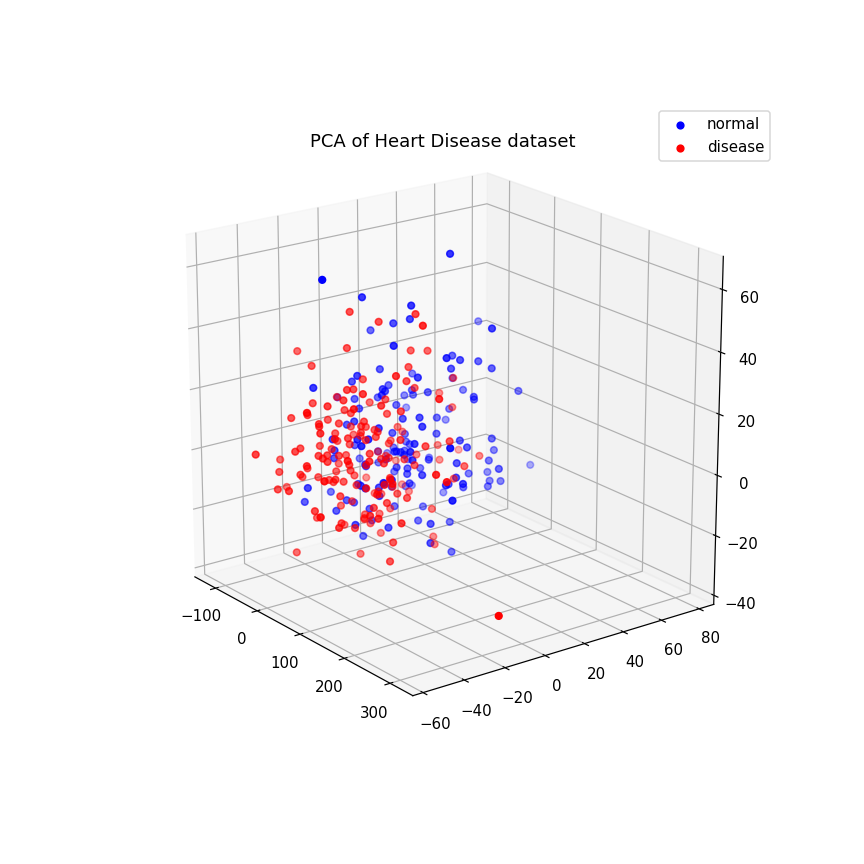

Text(0.5, 0.92, 'PCA of Heart Disease dataset')

In [14]:
%matplotlib notebook

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for c, i, target_name in zip("br", [0, 1], ['normal', 'disease']):
    ax.scatter3D(X_r[Y == i, 0], X_r[Y == i, 1], X_r[Y == i, 2], c=c, label=target_name)
plt.legend()
plt.title('PCA of Heart Disease dataset')